## 한글 형태소 분석 ,시각화, 워드 클라우드 등. 
### 형태소 분석, 품사 태깅. 
### 데이터 : 샘플 데이터 , 페이스북 전자 신문에서 크롤링 한 임시 데이터로  대체 
### 설치 가 조금 복잡함.
### 1) jdk 17 이상 2) JPype(자바, 파이썬 연결하는 도구) 3) konlpy 패키지 설치. 

## 주의사항, JPype 버전 1.4,  파이썬 버전 3.10.7 다운그레이드 
## 시스템 환경 변수 , ex) JAVA_HOME : 경로 추가 하기. jdk 17
### 변수명 : JAVA_HOME (동일하게)
### 시스템 환경 변수의 경로 값 예제: C:\Program Files\Java\jdk-17
### 변수명 : Path
### 경로 : C:\Program Files\Java\jdk-17\bin

## 파이썬 3.10.x , 예) 3.10.7 버전으로 다운 받기. 
### 시스템 환경 변수 추가 작업

### 변수명 : Path
### 경로C:\Python\Python39\

### 변수명 : Path
### 경로C:\Python\Python39\Scripts

### cmd -> python -V

## 2) JPype(자바, 파이썬 연결하는 도구)
### 다운로드 사이트 주소 : https://www.lfd.uci.edu/~gohlke/pythonlibs/#jpype 
### JPype 검색하고, 버전은 JPype1‑1.4.0‑cp310‑cp310‑win_amd64.whl 받아서, 
### 해당 다운로드 받은 폴더 이동하고, 해당 폴더 검색경로에서, cmd 실행하고, 
### cmd -> pip install JPype1‑1.4.0‑cp310‑cp310‑win_amd64.whl
### 업그레이드 경고창 뜨면 : 
### python.exe -m pip install --upgrade pip
### 업그레이드 후 , 다시 설치 
### pip install JPype1‑1.4.0‑cp310‑cp310‑win_amd64.whl
### , 명령어 붙여넣기. 
### pip install konlpy 




In [5]:
# !pip3 install matplotlib
# !pip3 install wordcloud


[notice] A new release of pip available: 22.2.2 -> 23.3.2
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip available: 22.2.2 -> 23.3.2
[notice] To update, run: pip install --upgrade pip


In [3]:
import json
import re 
from konlpy.tag import Okt
from collections import Counter
import matplotlib
import matplotlib.pyplot as plt 
from matplotlib import font_manager, rc 
from wordcloud import WordCloud 


In [9]:
# 샘플 데이터 읽어서, 메모리에서 확인해보기. 
inputFileName = "./etnews.kr_facebook_2016-01-01_2018-08-01_4차 산업혁명.json"
data = json.loads(open(inputFileName,"r",encoding = "utf-8").read())
data

[{'created_time': '2018-06-20 18:06:39',
  'link': 'https://www.facebook.com/etnews.kr/videos/1981346601899735/',
  'message': '6월의 스파크포럼 - "미래 시대, 조직의 변화도 시작됐다!"\n\n스파크포럼은 현 사회의 사회문제 및 이슈를 제기하고, 그 이슈를 혁신적으로 해결하고자 하는 소셜이노베이터를 발굴, 지원하여 우리 사회 따뜻한 변화를 확산시키지 위해 만들어진 도전과 만남의 자리입니다.\n\n6월의 스파크포럼에서는 4차 산업혁명 시대의 기업조직과 조직문화를 살펴보고, 조직의 변화를 받아들이고 실험해나가는 사례를 통해 미래 시대 조직이 나아가야 할 방향을 함께 생각해보고자 합니다.',
  'name': '6월의 스파크포럼 - "미래 시대, 조직의 변화도 시작됐다!"',
  'post_id': '407886705912407_1981346601899735',
  'total_comments': 3},
 {'created_time': '2018-06-14 10:41:16',
  'link': 'http://www.etnews.com/20180612000347',
  'message': '로봇이 4차 산업혁명 주요 성장 동력으로 떠오르면서 국내 로봇 기업에 재평가가 이뤄지고 있다는 분석입니다.',
  'name': '기술력 갖춘 로봇기업 몸값 치솟는다',
  'post_id': '407886705912407_1971252229575839',
  'total_comments': 0},
 {'created_time': '2018-04-10 17:42:00',
  'link': 'http://www.etnews.com/20180409000360?mc=em_002_00001',
  'message': '4차 산업혁명 시대 금융 산업 전반 점검해야 한다는...',
  'name': "휘청거리는 대한민국 '금융'...서민도 기업도 ICT도 실종",
  'post_id': '

In [17]:
# 해당 데이터에서, 기사 내용인 , message 부분의 값 추출 작업. 
# 임시 저장 문자열
message = ""
# data = [{딕션너리1},{딕션너리2},{딕션너리3},...]
for item in data:
  if "message" in item.keys():
    # (\w : 문자, 숫자 의미 ) 앞에 ^(not) 가 아닌 것은 모두 -> 공백으로 변경함. 
    # 하나의 임시 메세지 문자열 변수에 담기
    message = message + re.sub(r"[^\w]"," ", item["message"]) + ""
message

'6월의 스파크포럼    미래 시대  조직의 변화도 시작됐다    스파크포럼은 현 사회의 사회문제 및 이슈를 제기하고  그 이슈를 혁신적으로 해결하고자 하는 소셜이노베이터를 발굴  지원하여 우리 사회 따뜻한 변화를 확산시키지 위해 만들어진 도전과 만남의 자리입니다   6월의 스파크포럼에서는 4차 산업혁명 시대의 기업조직과 조직문화를 살펴보고  조직의 변화를 받아들이고 실험해나가는 사례를 통해 미래 시대 조직이 나아가야 할 방향을 함께 생각해보고자 합니다 로봇이 4차 산업혁명 주요 성장 동력으로 떠오르면서 국내 로봇 기업에 재평가가 이뤄지고 있다는 분석입니다 4차 산업혁명 시대 금융 산업 전반 점검해야 한다는   공통 간판 공약은  4차 산업혁명 선도 도시 구현 과  가상화폐 블록체인 기술 활용  등입니다  https   goo gl qPEyAJ이번 과정은 4차 산업혁명 핵심 기술인 AI에 대한 통찰력과 알파고를 통해 우리 일상과 익숙해진 로봇  빅데이터 산업 흐름을 알려줍니다   인공지능  최고위과정  산학연최고전문가 https   goo gl jSZSNX4차 산업혁명 모든 기술과 서비스 구현산업혁명의 나라  영국엔 4차 산업혁명이 없다  한국 영국 경험과 지혜를 모으는  미래비즈니스포럼 2017  개최 전자신문TV 라이브  SBA 신직업위크  4차 산업혁명 시대의 경쟁력 확보와 일자리 창출의 해법을 신직업에서 찾고 있는 서울산업진흥원 SBA 이 자신들의 역량과 노력을 모두 담은  제 2회 신직업위크 를 진행하고 있습니다   이번 전자신문TV라이브는 서울 대치동 SBA 신직업교육센터에서 강만구 신직업교육팀장과 서지윤 신직업리서치팀수석  윤석원 테스트웍스 대표 등과 함께  제 2회 신직업위크 와 최신 신직업트렌드를 알아보는 시간으로 마련했습니다  많은 시청 바랍니다     전자신문  전자신문엔터  전자신문TV  라이브  소셜방송  현장라이브  손보련  신직업위크  서울산업진흥원  SBA  신직업  서울  강만구  서지윤  윤석원  테스트웍스  소프트웨어  테스터

In [1]:
# 품사 태깅, Okt 패키지 사용하기. 
nlp = Okt()
message_N = nlp.nouns(message)
message_N

NameError: name 'Okt' is not defined

NameError: name 'Okt' is not defined

In [ ]:
# 집계 데이터 기본 탐색, 모델 구축 하기. 
count = Counter(message_N)
count

NameError: name 'Counter' is not defined

In [13]:
# 임시 딕션너리에 담아서, 필요한 부분 추출해서 조사. 
word_count = dict()

# 상위 80개 정도 
for tag, counts in count.most_common(80):
  if(len(str(tag))>1):
    word_count[tag] = counts
    # print(f" tag : {tag}, counts : {counts}")
word_count

NameError: name 'count' is not defined

<BarContainer object of 0 artists>

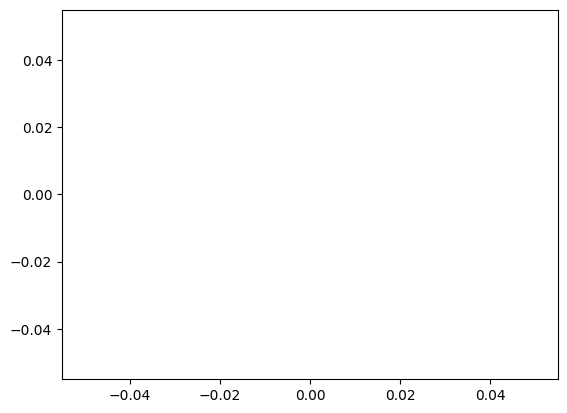

In [12]:
# 시각화1, 막대 그래프 
# 폰트 임포트 , 메모리에 설정 
font_path = "c:/Windows/Fonts/malgunbd.ttf"
font_name = font_manager.FontProperties(fname=font_path).get_name()
matplotlib.rc("font", family = font_name)

#, x축, y축, 가로x세로 비율, x 라벨, 폰트 설정 등
plt.figure(figsize=(12,6))
plt.xlabel("키워드")
plt.ylabel("빈도수")
plt.grid(True)

# 딕션너리의 키, 값 , 정렬 내림차순 
sorted_Keys = sorted(word_count, key=word_count.get, reverse=True)
sorted_Values = sorted(word_count.values(),reverse=True)

# 막대 그래프 그리기. 
plt.bar(range(len(word_count)), sorted_Values, align="center")

# x 축 라벨 설정. 
plt.xticks(range(len(word_count)), list(sorted_Keys), rotation = "vertical")

plt.show()

In [1]:
# 품사 태깅, Okt 패키지 사용하기. 
nlp = Okt()
message_N = nlp.nouns(message)
message_N

NameError: name 'Okt' is not defined

In [2]:
# 집계 데이터 기본 탐색, 모델 구축 하기. 
count = Counter(message_N)
count

NameError: name 'Counter' is not defined

In [3]:
# 임시 딕션너리에 담아서, 필요한 부분 추출해서 조사. 
word_count = dict()

# 상위 80개 정도 
for tag, counts in count.most_common(80):
  if(len(str(tag))>1):
    word_count[tag] = counts
    # print(f" tag : {tag}, counts : {counts}")
word_count

NameError: name 'count' is not defined

In [4]:
# 시각화1, 막대 그래프 
# 폰트 임포트 , 메모리에 설정 
font_path = "c:/Windows/Fonts/malgunbd.ttf"
font_name = font_manager.FontProperties(fname=font_path).get_name()
matplotlib.rc("font", family = font_name)

#, x축, y축, 가로x세로 비율, x 라벨, 폰트 설정 등
plt.figure(figsize=(12,6))
plt.xlabel("키워드")
plt.ylabel("빈도수")
plt.grid(True)

# 딕션너리의 키, 값 , 정렬 내림차순 
sorted_Keys = sorted(word_count, key=word_count.get, reverse=True)
sorted_Values = sorted(word_count.values(),reverse=True)

# 막대 그래프 그리기. 
plt.bar(range(len(word_count)), sorted_Values, align="center")

# x 축 라벨 설정. 
plt.xticks(range(len(word_count)), list(sorted_Keys), rotation = "vertical")

plt.show()

NameError: name 'font_manager' is not defined